In [3]:
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

In [ ]:
pip install category_encoders

In [4]:
df = pd.read_csv("data/training_dataset.csv",index_col="observation_id").drop(columns="Unnamed: 0")

In [14]:
df.head()

,observation_timestamp,hour_of_day,register__sales_dollar_amt_this_hour,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
observation_id,,,,,,,,,,,,,,,,,,,,,
704d2a80-d52e-11ec-90ff-c7e6292284b3,2022-05-16 15:39:57,15,347.29,Cash+Credit,-0.7383,-0.1270,-0.1993,-0.8299,-0.1247,-0.5721,...,-0.6920,-0.4605,-0.5180,-1.0062,-0.6462,-0.6030,-0.4773,0.1748,-1.7951,-0.8284
1cacc1d0-e6ac-11ec-b65d-156af70ce36b,2022-06-07 21:52:23,21,361.59,Cash+Credit,0.6483,-0.0362,-0.0777,-0.7395,-0.1135,-0.5251,...,-0.6531,-0.4434,-0.6498,0.9031,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
6dc2b330-d37a-11ec-884e-dfe9ea4a7bd5,2022-05-14 11:38:52,11,850.73,Cash+Credit,-0.4950,-0.1268,-0.1974,1.3139,0.1075,-0.5251,...,-0.6120,-0.1786,-0.6040,-1.4229,-0.6456,-0.6037,1.9337,-0.9093,2.4046,-0.7567
163ee0a0-0cca-11ed-a73c-8904b24187cc,2022-07-26 10:02:41,10,1175.69,Cash+Credit,-0.5594,-0.1270,-0.1991,-0.8299,-0.1247,-0.5251,...,-0.5472,0.1246,-0.5925,-1.4097,-0.6478,-0.6079,0.1288,-0.9093,-0.4983,-0.7567
5e3c5df0-d5ee-11ec-a5f2-3b6f99e95850,2022-05-17 14:33:50,14,3204.53,Cash+Credit,0.5693,-0.1221,-0.1632,-0.7071,-0.1247,0.7604,...,-0.3838,0.1996,-0.5696,1.1231,-0.6475,-0.6032,1.0050,0.1748,1.5660,0.2356


In [14]:
df.shape

(16465, 61)

In [15]:
df.columns

Index(['observation_timestamp', 'hour_of_day',
       'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__sales_quantity_rescanned_frac',
       'register__sales_payments_declined_frac',
       'register__peak_returns_dollar_amt_per_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour',
       'register__returns_quantity_rescanned_frac', 'cashier__title_level',
       'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min', 'store__type_code',
       'store__miles_to_nearest_location',
       'store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio',
       'store__mean_service_time_per_customer', 'store__n_employees_total',
    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 704d2a80-d52e-11ec-90ff-c7e6292284b3 to 627bba50-d346-11ec-82ba-931947aa823c
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   observation_timestamp                        16465 non-null  object 
 1   hour_of_day                                  16465 non-null  int64  
 2   register__sales_dollar_amt_this_hour         16465 non-null  float64
 3   register__payment_types_accepted             16465 non-null  object 
 4   register__peak_sales_dollar_amt_per_hour     16465 non-null  float64
 5   register__sales_dollar_amt_last_hour         16465 non-null  float64
 6   register__sales_quantity_last_hour           16465 non-null  float64
 7   register__sales_quantity_rescanned_frac      16465 non-null  float64
 8   register__sales_payments_declined_frac       16465 non-null  float64
 9   register__p

In [18]:
df.select_dtypes("object").nunique()

observation_timestamp               16420
register__payment_types_accepted        3
store__type_code                        6
dtype: int64

In [19]:
df.nunique()

observation_timestamp                          16420
hour_of_day                                       24
register__sales_dollar_amt_this_hour           14559
register__payment_types_accepted                   3
register__peak_sales_dollar_amt_per_hour         107
                                               ...  
region__nighttime_returns_amt_per_hour            93
region__peak_sales_dollar_amt_per_hour            80
region__peak_sales_dollar_amt_per_hour_v2         10
region__peak_returns_dollar_amt_per_hour          85
region__peak_returns_dollar_amt_per_hour_v2       10
Length: 61, dtype: int64

In [20]:
df.corr()

,hour_of_day,register__sales_dollar_amt_this_hour,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,register__returns_dollar_amt_last_hour,register__returns_quantity_last_hour,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
hour_of_day,1.000000,0.061683,-0.052779,-0.013914,-0.007655,0.025352,0.010631,-0.038654,-0.012131,-0.016379,...,-0.165571,-0.082024,-0.056442,-0.032072,-0.066339,-0.060471,0.008468,-0.004624,-0.056237,-0.071105
register__sales_dollar_amt_this_hour,0.061683,1.000000,0.184147,0.081776,0.112885,-0.280189,-0.073454,0.319232,0.142764,0.122143,...,0.132301,0.132846,0.096652,-0.083713,0.087903,0.080716,0.326080,0.364797,0.010785,0.337970
register__peak_sales_dollar_amt_per_hour,-0.052779,0.184147,1.000000,0.015346,0.010321,-0.041280,-0.056240,0.802251,-0.052789,-0.046287,...,-0.339583,-0.192468,-0.385497,0.079508,-0.422587,-0.395936,-0.006414,-0.337258,0.129379,-0.579397
register__sales_dollar_amt_last_hour,-0.013914,0.081776,0.015346,1.000000,0.990309,-0.049045,-0.009546,0.035874,0.933334,0.954966,...,0.012327,0.013355,0.008508,-0.013782,0.007528,0.007191,0.018833,0.027168,-0.010412,0.019718
register__sales_quantity_last_hour,-0.007655,0.112885,0.010321,0.990309,1.000000,-0.067006,-0.010326,0.040513,0.943073,0.960328,...,0.009898,0.015243,0.005573,-0.032081,0.003452,0.003288,0.024979,0.035840,-0.027043,0.020353
register__sales_quantity_rescanned_frac,0.025352,-0.280189,-0.041280,-0.049045,-0.067006,1.000000,0.286578,-0.159765,-0.085153,-0.084080,...,-0.306329,-0.150035,-0.315857,-0.099845,-0.339306,-0.313669,-0.029366,-0.445698,0.213727,-0.412489
register__sales_payments_declined_frac,0.010631,-0.073454,-0.056240,-0.009546,-0.010326,0.286578,1.000000,-0.039697,-0.006153,-0.007429,...,-0.017491,-0.009571,-0.022258,-0.081987,-0.026483,-0.024307,0.061263,-0.048499,0.075827,-0.035748
register__peak_returns_dollar_amt_per_hour,-0.038654,0.319232,0.802251,0.035874,0.040513,-0.159765,-0.039697,1.000000,-0.006856,-0.003932,...,-0.110835,-0.077408,-0.139488,-0.103199,-0.163701,-0.153983,0.110061,-0.031910,-0.005192,-0.103422
register__returns_dollar_amt_last_hour,-0.012131,0.142764,-0.052789,0.933334,0.943073,-0.085153,-0.006153,-0.006856,1.000000,0.995903,...,0.086468,0.063608,0.085267,0.002771,0.094740,0.086693,0.053621,0.122395,0.005416,0.127801
register__returns_quantity_last_hour,-0.016379,0.122143,-0.046287,0.954966,0.960328,-0.084080,-0.007429,-0.003932,0.995903,1.000000,...,0.076299,0.055454,0.075403,0.001353,0.083702,0.076781,0.045493,0.104386,0.004848,0.110665


In [8]:
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df[feature]

In [5]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (13172, 1)
y_train shape: (13172,)
X_test shape: (3293, 1)
y_test shape: (3293,)


In [32]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean apt price: 1169.6943023079248
Baseline MAE: 633.8025142478238


In [33]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
model2 = Ridge()
model2.fit(X_train,y_train)

Ridge()

In [45]:
mae_training = mean_absolute_error(y_val, model2.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 510.43


In [46]:
predictions2 = model2.predict(X_test[feature])
results_df = pd.DataFrame({'prediction':predictions2})
results_df.to_csv('predictions2.csv',index=False)

In [36]:
mae_training = mean_absolute_error(y_val, model.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 510.43


In [37]:
X_test = pd.read_csv("data/test_dataset.csv")

In [38]:
X_test.head()

,observation_id,observation_timestamp,hour_of_day,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
0,3f483640-bc52-11ec-b736-8544dc068949,15/04/2022 00:23,0,Cash+Credit,0.5693,-0.1253,-0.1489,-0.8176,-0.1066,0.9103,...,-0.6373,-0.3791,-0.5581,-0.7148,-0.6487,-0.6091,1.0020,-0.5479,0.8761,NaN
1,a88b0bb0-d2ae-11ec-bd0e-f5a7c7895456,13/05/2022 11:20,11,Cash+Credit,0.3084,-0.1270,-0.1986,1.6562,-0.1247,-0.5251,...,-0.6483,-0.4419,-0.6498,0.8867,-0.6493,-0.6106,-1.9779,-0.9816,-0.1311,-0.8614
2,90611780-d607-11ec-a5d8-675445c92326,17/05/2022 17:34,17,Cash+Credit,-0.6757,0.1925,0.2534,-0.7517,-0.1247,-0.5251,...,0.6712,0.3971,2.0094,0.0464,1.8275,2.0689,0.0332,1.3795,-0.3489,1.3382
3,a98380e0-e2d2-11ec-b28f-7f4d381958ee,03/06/2022 00:18,0,Cash+Credit,-0.1747,-0.1258,-0.1709,-0.3576,-0.1247,-0.5251,...,-0.6653,-0.4437,-0.6498,0.8937,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
4,608b8e60-e4f2-11ec-8115-d3258731976b,05/06/2022 17:10,17,Cash+Credit,0.6483,-0.0612,-0.0995,0.1060,-0.1247,-0.5251,...,-0.6495,-0.4418,-0.6498,0.9006,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614


In [39]:
predictions1 = model.predict(X_test[feature])
results_df = pd.DataFrame({'prediction':predictions1})
results_df.to_csv('predictions1.csv',index=False)

In [40]:
print(predictions1)

[2121.42840594  988.97658904  988.97658904 ...  988.97658904  988.97658904
  988.97658904]


In [43]:
results_df = pd.DataFrame({'prediction':predictions1})
results_df.to_csv('predictions1.csv',index=False)

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model3 = DecisionTreeRegressor(random_state=1)

In [49]:
model3.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [50]:
mae_training = mean_absolute_error(y_val, model3.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 502.04


In [53]:
predictions3 = model3.predict(X_test[feature])
results_df = pd.DataFrame({'prediction':predictions3})
results_df.to_csv('predictions3.csv',index=False)

In [58]:
def get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    return(mae)
for max_leaf_nodes in [5, 50, 500, 5000]:
    model4 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model4.fit(X_train, y_train)
    preds_val = model4.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

In [61]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    model4 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model4.fit(X_train, y_train)
    preds_val = model4.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    

Max leaf nodes: 5  		 Mean Absolute Error:  502
Max leaf nodes: 50  		 Mean Absolute Error:  502
Max leaf nodes: 500  		 Mean Absolute Error:  502
Max leaf nodes: 5000  		 Mean Absolute Error:  502


In [60]:
 print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5000  		 Mean Absolute Error:  502


In [65]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_val)
print(mean_absolute_error(y_val, melb_preds))

502.0782284061095


In [1]:
#df_numeric = df.select_dtypes(include=[np.number])
#numeric_cols = df_numeric.columns.values
#df_non_numeric = df.select_dtypes(exclude=[np.number])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 704d2a80-d52e-11ec-90ff-c7e6292284b3 to 627bba50-d346-11ec-82ba-931947aa823c
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   observation_timestamp                        16465 non-null  object 
 1   hour_of_day                                  16465 non-null  int64  
 2   register__sales_dollar_amt_this_hour         16465 non-null  float64
 3   register__payment_types_accepted             16465 non-null  object 
 4   register__peak_sales_dollar_amt_per_hour     16465 non-null  float64
 5   register__sales_dollar_amt_last_hour         16465 non-null  float64
 6   register__sales_quantity_last_hour           16465 non-null  float64
 7   register__sales_quantity_rescanned_frac      16465 non-null  float64
 8   register__sales_payments_declined_frac       16465 non-null  float64
 9   register__p

AxesSubplot(0.125,0.125;0.775x0.755)


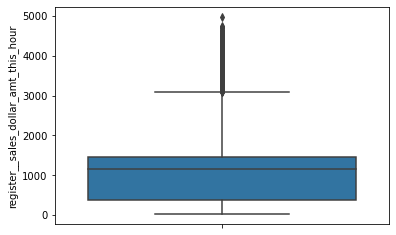

In [50]:
print(sns.boxplot(data = df,y=target))


AxesSubplot(0.125,0.125;0.775x0.755)


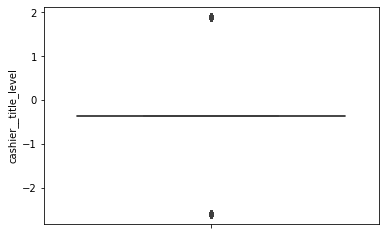

In [52]:
print(sns.boxplot(data = df, y ='cashier__title_level'))

array([[<AxesSubplot:title={'center':'cashier__title_level'}>]],
      dtype=object)

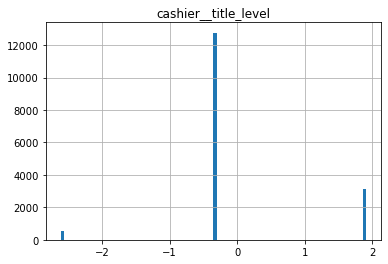

In [17]:
df[feature].hist(bins=100)

<AxesSubplot:>

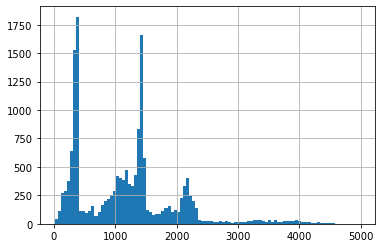

In [19]:
df[target].hist(bins=100)

In [20]:
df[target].describe()

count    16465.000000
mean      1170.197809
std        820.732865
min         15.710000
25%        369.140000
50%       1165.410000
75%       1457.890000
max       4978.650000
Name: register__sales_dollar_amt_this_hour, dtype: float64

In [33]:
feature

['cashier__title_level']

In [31]:
df[feature].info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 704d2a80-d52e-11ec-90ff-c7e6292284b3 to 627bba50-d346-11ec-82ba-931947aa823c
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cashier__title_level  16465 non-null  float64
dtypes: float64(1)
memory usage: 773.3+ KB


In [25]:
df[target]

observation_id
704d2a80-d52e-11ec-90ff-c7e6292284b3     347.29
1cacc1d0-e6ac-11ec-b65d-156af70ce36b     361.59
6dc2b330-d37a-11ec-884e-dfe9ea4a7bd5     850.73
163ee0a0-0cca-11ed-a73c-8904b24187cc    1175.69
5e3c5df0-d5ee-11ec-a5f2-3b6f99e95850    3204.53
                                         ...   
53184020-dc2d-11ec-ad19-15d84fc8a277    2314.75
a483a560-d1cb-11ec-862f-d1f19efded59     293.92
c02c2240-d3b2-11ec-9c3c-abb29ae7c49c    1460.03
7d5c4a20-eb64-11ec-a49a-0552c9d0f376     465.24
627bba50-d346-11ec-82ba-931947aa823c     352.79
Name: register__sales_dollar_amt_this_hour, Length: 16465, dtype: float64

In [102]:
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','register__payment_types_accepted','region__peak_sales_dollar_amt_per_hour_v2','store__type_code','region__peak_returns_dollar_amt_per_hour_v2',])
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (13171, 55)
y_train shape: (13171,)
X_test shape: (3293, 55)
y_test shape: (3293,)


In [56]:
df.shape

(16465, 61)

In [90]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [91]:
mae_training = mean_absolute_error(y_val, model.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 279.72


In [92]:
model2= Ridge()
model2.fit(X_train,y_train)

Ridge()

In [93]:
mae_training = mean_absolute_error(y_val, model2.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 278.94


In [94]:
model3 = DecisionTreeRegressor(random_state=1)
model3.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [95]:
mae_training = mean_absolute_error(y_val, model3.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 130.2


In [87]:
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model4 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression())
model4.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [88]:
mae_training = mean_absolute_error(y_val, model4.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 204.84


In [96]:
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model5 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    Ridge())
model5.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [97]:
mae_training = mean_absolute_error(y_val, model5.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 204.39


In [99]:
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model6 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    DecisionTreeRegressor(random_state=2))
model6.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=2))])

In [100]:
mae_training = mean_absolute_error(y_val, model6.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 130.52


In [103]:
X_test = pd.read_csv("data/test_dataset.csv")
predictions5 = model3.predict(X_test[X.columns])
results_df = pd.DataFrame({'prediction':predictions5})
results_df.to_csv('predictions5.csv',index=False)

In [105]:
from sklearn.ensemble import RandomForestRegressor
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100, random_state = 0))
regressor.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [106]:
mae_training = mean_absolute_error(y_val, regressor.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 100.51


In [107]:
X_test = pd.read_csv("data/test_dataset.csv")
predictions6 = regressor.predict(X_test[X.columns])
results_df = pd.DataFrame({'prediction':predictions6})
results_df.to_csv('predictions6.csv',index=False)

In [110]:
def get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    return(mae)
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

for max_leaf_nodes in [5, 50, 500, 5000]:
    model7 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0))
    model7.fit(X_train, y_train)
    preds_val = model7.predict(X_val)
    my_mae = mean_absolute_error(y_val, preds_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  249
Max leaf nodes: 50  		 Mean Absolute Error:  127
Max leaf nodes: 500  		 Mean Absolute Error:  116
Max leaf nodes: 5000  		 Mean Absolute Error:  129


In [112]:
def get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    return(mae)
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

for max_leaf_nodes in [5, 50, 500, 5000]:
    model7 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, n_estimators = 100,random_state=0))
    model7.fit(X_train, y_train)
    preds_val = model7.predict(X_val)
    my_mae = mean_absolute_error(y_val, preds_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  249
Max leaf nodes: 50  		 Mean Absolute Error:  120
Max leaf nodes: 500  		 Mean Absolute Error:  101
Max leaf nodes: 5000  		 Mean Absolute Error:  100


In [118]:
model8 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(max_leaf_nodes=20000, n_estimators = 100,random_state=0))
model8.fit(X_train, y_train)
preds_val = model8.predict(X_val)
my_mae = mean_absolute_error(y_val, preds_val)
print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5000  		 Mean Absolute Error:  100


In [123]:
for max_depth in range(1,12):
    model7 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(max_leaf_nodes=5000,max_depth=max_depth, n_estimators = 100,random_state=0))
    model7.fit(X_train, y_train)
    preds_val = model7.predict(X_val)
    my_mae = mean_absolute_error(y_val, preds_val)
    print("Max depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))

Max depth: 1  		 Mean Absolute Error:  459
Max depth: 2  		 Mean Absolute Error:  295
Max depth: 3  		 Mean Absolute Error:  239
Max depth: 4  		 Mean Absolute Error:  174
Max depth: 5  		 Mean Absolute Error:  137
Max depth: 6  		 Mean Absolute Error:  122
Max depth: 7  		 Mean Absolute Error:  114
Max depth: 8  		 Mean Absolute Error:  110
Max depth: 9  		 Mean Absolute Error:  106
Max depth: 10  		 Mean Absolute Error:  104
Max depth: 11  		 Mean Absolute Error:  102


In [124]:
for max_depth in range(12,16):
    model7 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(max_leaf_nodes=5000,max_depth=max_depth, n_estimators = 100,random_state=0))
    model7.fit(X_train, y_train)
    preds_val = model7.predict(X_val)
    my_mae = mean_absolute_error(y_val, preds_val)
    print("Max depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))

Max depth: 12  		 Mean Absolute Error:  101
Max depth: 13  		 Mean Absolute Error:  101
Max depth: 14  		 Mean Absolute Error:  100
Max depth: 15  		 Mean Absolute Error:  100


In [125]:
model7 = make_pipeline(
OneHotEncoder(),
SimpleImputer(),
RandomForestRegressor(max_leaf_nodes=6000,max_depth=18, n_estimators = 100,random_state=0))
model7.fit(X_train, y_train)
preds_val = model7.predict(X_val)
my_mae = mean_absolute_error(y_val, preds_val)
print("Max depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))

Max depth: 15  		 Mean Absolute Error:  100


In [ ]:
from sklearn.ensemble import RandomForestRegressor
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

for criterion in ['squared_error', 'absolute_error', 'poisson']:
    model7 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(criterion=criterion, n_estimators = 100,random_state=0))
    model7.fit(X_train, y_train)
    preds_val = model7.predict(X_val)
    my_mae = mean_absolute_error(y_val, preds_val)
    print("{} - {}".format(criterion, my_mae))

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model8 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0))
model8.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [14]:
mae_training = mean_absolute_error(y_val, model8.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 94.86


In [9]:
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model8 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0, criterion='absolute_error'))
model8.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(criterion='absolute_error',
                                       random_state=0))])

In [10]:
mae_training = mean_absolute_error(y_val, model8.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 96.99


In [11]:
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model8 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0, criterion='poisson'))
model8.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(criterion='poisson', random_state=0))])

In [12]:
mae_training = mean_absolute_error(y_val, model8.predict(X_val))
print("Training MAE:", round(mae_training, 2))

Training MAE: 97.38


In [15]:
X_test = pd.read_csv("data/test_dataset.csv")
predictions8 = model8.predict(X_test[X.columns])
results_df = pd.DataFrame({'prediction':predictions8})
results_df.to_csv('predictions8.csv',index=False)

<AxesSubplot:ylabel='cashier__title_level'>

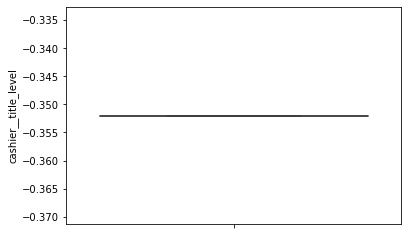

In [13]:
df['cashier__title_level'].describe()

count    16465.000000
mean        -0.001098
std          1.007756
min         -2.603600
25%         -0.352000
50%         -0.352000
75%         -0.352000
max          1.899600
Name: cashier__title_level, dtype: float64

In [14]:
df['cashier__title_level']

observation_id
704d2a80-d52e-11ec-90ff-c7e6292284b3   -2.6036
1cacc1d0-e6ac-11ec-b65d-156af70ce36b   -0.3520
6dc2b330-d37a-11ec-884e-dfe9ea4a7bd5   -0.3520
163ee0a0-0cca-11ed-a73c-8904b24187cc   -0.3520
5e3c5df0-d5ee-11ec-a5f2-3b6f99e95850    1.8996
                                         ...  
53184020-dc2d-11ec-ad19-15d84fc8a277   -0.3520
a483a560-d1cb-11ec-862f-d1f19efded59   -0.3520
c02c2240-d3b2-11ec-9c3c-abb29ae7c49c   -0.3520
7d5c4a20-eb64-11ec-a49a-0552c9d0f376   -0.3520
627bba50-d346-11ec-82ba-931947aa823c   -0.3520
Name: cashier__title_level, Length: 16465, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 704d2a80-d52e-11ec-90ff-c7e6292284b3 to 627bba50-d346-11ec-82ba-931947aa823c
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   observation_timestamp                        16465 non-null  object 
 1   hour_of_day                                  16465 non-null  int64  
 2   register__sales_dollar_amt_this_hour         16465 non-null  float64
 3   register__payment_types_accepted             16465 non-null  object 
 4   register__peak_sales_dollar_amt_per_hour     16465 non-null  float64
 5   register__sales_dollar_amt_last_hour         16465 non-null  float64
 6   register__sales_quantity_last_hour           16465 non-null  float64
 7   register__sales_quantity_rescanned_frac      16465 non-null  float64
 8   register__sales_payments_declined_frac       16465 non-null  float64
 9   register__p

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

strategy_list = ["mean","median","most_frequent"]
for strategy in strategy_list:
    model9 = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(strategy=strategy),
        RandomForestRegressor(n_estimators = 100,random_state=0))
    model9.fit(X_train, y_train)
    my_mae = mean_absolute_error(y_val,model9.predict(X_val))
    print("{} - {}".format(strategy, my_mae))

mean - 94.86495464419474
median - 94.92325627644497
most_frequent - 95.0741416570503


In [27]:
df["cashier__title_level"].unique()

array([-2.6036, -0.352 ,  1.8996])

In [33]:
dic = {
    -0.352:"zero",
    1.8996:"one",
    -2.6036:"two"
        }
df["cashier__title_level_cat"] = df["cashier__title_level"].map(dic)


Index(['observation_timestamp', 'hour_of_day',
       'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__sales_quantity_rescanned_frac',
       'register__sales_payments_declined_frac',
       'register__peak_returns_dollar_amt_per_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour',
       'register__returns_quantity_rescanned_frac', 'cashier__title_level',
       'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min', 'store__type_code',
       'store__miles_to_nearest_location',
       'store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio',
       'store__mean_service_time_per_customer', 'store__n_employees_total',
    

In [21]:
"cashier__title_level_cat" in df.columns

False

In [38]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2',"cashier__title_level"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model9 = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        RandomForestRegressor(n_estimators = 100,random_state=0))
model9.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code',
                                     'cashier__title_level_cat'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [40]:
mean_absolute_error(y_val,model9.predict(X_val))

94.73577562759391

In [42]:
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2',"cashier__title_level_cat"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators_list=range(25,200,25)
for n_estimators in n_estimators_list:
    model9a = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        RandomForestRegressor(n_estimators = n_estimators,random_state=0))
    model9a.fit(X_train, y_train)
    mae = mean_absolute_error(y_val,model9a.predict(X_val))
    print("{} -  {}".format(n_estimators,mae))
    

25 -  97.2293432128758
50 -  95.26071782265413
75 -  95.1647181516348
100 -  94.73577562759391
125 -  94.56883071768401
150 -  94.54722753854979
175 -  94.53317182652958


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2',"cashier__title_level_cat"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model9b = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        GradientBoostingRegressor(n_estimators =175,random_state=0))
model9b.fit(X_train, y_train)
    

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=175, random_state=0))])

In [44]:
mean_absolute_error(y_val,model9b.predict(X_val))

118.50049531591858

In [45]:
n_estimators_list =range(20,31,5)
for n_estimators in n_estimators_list:
    model9c = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        GradientBoostingRegressor(n_estimators =n_estimators,random_state=0))
    model9c.fit(X_train, y_train)
    mae= mean_absolute_error(y_val,model9c.predict(X_val))
    print("{}  - {}".format(n_estimators,mae))

20  - 216.14347936803182
25  - 186.53951436201427
30  - 164.85785389464615


In [56]:
params = {"simpleimputer__strategy":["mean","median","most_frequent"],
         "randomforestregressor__n_estimators":range(50,100,25),
         "randomforestregressor__max_depth":range(10,15,2)}
params

{'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
 'randomforestregressor__n_estimators': range(50, 100, 25),
 'randomforestregressor__max_depth': range(10, 15, 2)}

In [57]:
clf = make_pipeline(SimpleImputer(),OneHotEncoder(), RandomForestRegressor())

In [ ]:
from sklearn.model_selection import GridSearchCV
model9d = GridSearchCV(clf,param_grid=params,cv=5,verbose=1)
model9d.fit(X_train,y_train)

In [60]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2',"cashier__title_level_cat"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model10 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0))
model10.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [61]:
mean_absolute_error(y_val,model10.predict(X_val))

94.86495464419474

In [62]:
X_test = pd.read_csv("data/test_dataset.csv")
predictions9 = model10.predict(X_test[X.columns])
results_df = pd.DataFrame({'prediction':predictions9})
results_df.to_csv('predictions9.csv',index=False)

In [63]:
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2',"cashier__title_level"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model11 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0))
model11.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'store__type_code',
                                     'cashier__title_level_cat'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [64]:
mean_absolute_error(y_val,model11.predict(X_val))

94.73577562759391

In [ ]:
df.info()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
target = "register__sales_dollar_amt_this_hour"
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model12 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0))
model12.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'cashier__title_level',
                                     'store__type_code'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [15]:
df["cashier__title_level"]=df["cashier__title_level"].astype("object")

In [18]:
mean_absolute_error(y_val,model12.predict(X_val))

94.70727307976516

In [20]:
X_test = pd.read_csv("data/test_dataset.csv")
predictions11 = model12.predict(X_test[X.columns])
results_df = pd.DataFrame({'prediction':predictions11})
results_df.to_csv('predictions11.csv',index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 704d2a80-d52e-11ec-90ff-c7e6292284b3 to 627bba50-d346-11ec-82ba-931947aa823c
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   observation_timestamp                        16465 non-null  object 
 1   hour_of_day                                  16465 non-null  int64  
 2   register__sales_dollar_amt_this_hour         16465 non-null  float64
 3   register__payment_types_accepted             16465 non-null  object 
 4   register__peak_sales_dollar_amt_per_hour     16465 non-null  float64
 5   register__sales_dollar_amt_last_hour         16465 non-null  float64
 6   register__sales_quantity_last_hour           16465 non-null  float64
 7   register__sales_quantity_rescanned_frac      16465 non-null  float64
 8   register__sales_payments_declined_frac       16465 non-null  float64
 9   register__p

In [24]:
min_sample = range(2,10)
for min_samples_split in min_sample:
    model13 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0,min_samples_split=min_samples_split))
    model13.fit(X_train, y_train)
    mae = mean_absolute_error(y_val,model12.predict(X_val))
    print("{} -   {}".format(min_samples_split,mae))


2 -   94.70727307976516
3 -   94.70727307976516
4 -   94.70727307976516
5 -   94.70727307976516
6 -   94.70727307976516
7 -   94.70727307976516
8 -   94.70727307976516
9 -   94.70727307976516


In [ ]:
min_samples_leaf_list = range(1,10)
for min_samples_leaf in min_samples_leaf_list:
    model14 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0,min_samples_leaf=min_samples_leaf))
    model14.fit(X_train, y_train)
    mae = mean_absolute_error(y_val,model12.predict(X_val))
    print("{} -   {}".format(min_samples_leaf,mae))

In [ ]:
df.corr()

In [ ]:
%matplotlib inline 
for column in df.select_dtypes(exclude=['object']):
    print(
        df[column].nunique(),
        df[column].unique()[:5],
        df[column].describe())
    plt.figure(),
    df.boxplot(column),
    df.hist(column,bins=100),
    plt.show()
        
    print()


In [11]:

for col in ["cashier__title_level","store__is_sufficiently_staffed"]:
        df[col] = df[col].astype("object")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 704d2a80-d52e-11ec-90ff-c7e6292284b3 to 627bba50-d346-11ec-82ba-931947aa823c
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   observation_timestamp                        16465 non-null  object 
 1   hour_of_day                                  16465 non-null  int64  
 2   register__sales_dollar_amt_this_hour         16465 non-null  float64
 3   register__payment_types_accepted             16465 non-null  object 
 4   register__peak_sales_dollar_amt_per_hour     16465 non-null  float64
 5   register__sales_dollar_amt_last_hour         16465 non-null  float64
 6   register__sales_quantity_last_hour           16465 non-null  float64
 7   register__sales_quantity_rescanned_frac      16465 non-null  float64
 8   register__sales_payments_declined_frac       16465 non-null  float64
 9   register__p

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model15 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 100,random_state=0))
model15.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'cashier__title_level', 'store__type_code',
                                     'store__is_sufficiently_staffed'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [20]:
mean_absolute_error(y_val,model15.predict(X_val))

94.55625458599047

In [29]:
target = "register__sales_dollar_amt_this_hour"
feature = ["cashier__title_level"]
y = df[target]
X = df.drop(columns=[target,'observation_timestamp','region__peak_sales_dollar_amt_per_hour_v2','region__peak_returns_dollar_amt_per_hour_v2'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model15 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators = 175,random_state=0,n_jobs=-1))
model15.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['register__payment_types_accepted',
                                     'cashier__title_level', 'store__type_code',
                                     'store__is_sufficiently_staffed'])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=175, n_jobs=-1,
                                       random_state=0))])

In [30]:
mean_absolute_error(y_val,model15.predict(X_val))

94.38004361141239

In [31]:
X_test = pd.read_csv("data/test_dataset.csv")
predictions12 = model15.predict(X_test[X.columns])
results_df = pd.DataFrame({'prediction':predictions12})
results_df.to_csv('predictions12.csv',index=False)